## Veri Setini Yükleme ve İnceleme
İlk önce veri setini yükleyerek başlayalım.

In [ ]:
import pandas as pd


# Veri setini yükleme
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

Verimizi incelemek için ilk 10 satırını, satır ve sütun sayısını ve özelliklerimizin veri tiplerini inceleyelim.

In [ ]:
print(df.head(10))  # Default değeri 5 satırını gösterir ben ilk 10 satıra bakmayı tercih ettiğim için fonksiyonu 10 değerini gönderdim.

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

Veri setimize biraz göz attığımız zaman elimizde bazı sayısal değerler ve kategorik değerler olduğunu görmekteyiz. Bu veri setinde bölgelerdeki evlerin ortalam yaşı, toplam oda sayısı, bölgedeki toplam kişi sayısı yani popülasyonu, bçlgedeki hanelerin ortalama geliri gibi değerleri bulduruduğunu gözlemleyebiliriz.

In [ ]:
print(df.shape)  # (satır sayısı, sütun sayısı)

(20640, 10)


20 binden fazla satıdan be 10 sütundan oluşan bir veri setimiz olduğunu da görüyoruz.

In [ ]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


head kullanarak gözlemlediğimizde fark ettiğimiz gibi elimizde bir adet kategorik değişken ve kalanları dasayısal değişkenler olarak bahsedebileceğimiz bir veri setimiz var.

In [ ]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Describe fonksiyonunu çağırarak veri setimizdeki sayısal değişkenlerin minimum, maksimum, ortalama, medyan ve çeyrek değerlerini incelemekteyiz.

In [ ]:
print(df.describe(include="O"))

       ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136


Describe fonksiyonunu kullanırken "include='O'" parametresini göderirsek (O object e karşılık gelmekte) kategorik değişkenlerin analizini yapabilmemizi sağlar. bizim veri setimizdeki kategorik değişkenin 5 farklı unique değeri varmış. Yani 5 farklı değerle doldurulmuş bir değişkenmiş.

## Eksik Verileri Doldurma

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Acaba elimdeki veri setinde ne kadar eksik değer var diye bir bakalım dedim ve yalnızda total_bedrooms değişkeninde 207 tane eksik değer olduğunu gördük. Hesaplama yapmadan da bu eksik değer oranının %75 ten fazla olmadığını anlayabiliriz o yüzden silmek yerine eksik değerleri dolduracağız, fakat yine de tamamen emin olmak için yüzdesini bulalım.

In [ ]:
# Eksik değerlerin toplam sayısını hesaplayalım
missing_values = df.isnull().sum()

# Eksik değerlerin yüzde kaçını oluşturduğunu hesaplayalım
missing_percentage = (missing_values / len(df)) * 100

# Eksik değer tablosunu oluşturalım
missing_table = pd.DataFrame({
    'Eksik Değer Sayısı': missing_values,
    'Eksik Değer Yüzdesi (%)': missing_percentage.round(2)
})

# Eksik değeri olan sütunları filtreleyelim (sadece eksik değeri olanları göster)
missing_table = missing_table[missing_table['Eksik Değer Sayısı'] > 0]

# Sonucu görüntüleyelim
missing_table

,Eksik Değer Sayısı,Eksik Değer Yüzdesi (%)
total_bedrooms,207,1.0


Yüzde 1 kadar düşük bir değer elde ettik tabi ki bu sütunu silmeyeceğiz, onun yerine elimizdeki değerlerin median değerleriyle eksik değerleri doldurmalıyız. (Sayısal bir değişken oldupu için)

In [ ]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Veri setindeki "total_bedrooms" değişkenindeki eksik değerleri değişkendeki değerlerin median değeri ne ise onunla doldurduk. Sonrasında kontrol etmek amacıyla eksik değer kaldı mı diye tekrardan isnull fonksiyonumuzu çalıştırdığımızda eksik değer kalmadığını gözlemleyebiliyoruz.

## Aykırı Değer Analizi ve Temizleme
Verimizi boxplot kullanarak görselleştirme işlemleri yapacağım ve bunun sonucunda gözlemlediğim aykırı değerleri temizlemeliyiz. Aykırı değerler modelin yanlış öğrenmesine sebep olabilri bu yüzden onlardan bir şekilde kurtulmalıyız.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

def analyze_outliers_all_methods(data, numeric_columns):
    for col in numeric_columns:
        print(f"\n--- {col} Sütunu ---")

        # Orijinal boxplot
        plt.boxplot(data[col], vert=False, patch_artist=True)
        plt.title(f"Boxplot of {col} (Orijinal)")
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

        # IQR yöntemi
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_iqr = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
        print(f"IQR ile Aykırı Değer Sayısı: {len(outliers_iqr)}")

        # Z-score yöntemi
        z_scores = zscore(data[col].dropna())
        outliers_z = data[np.abs(z_scores) > 3]
        print(f"Z-Score ile Aykırı Değer Sayısı: {len(outliers_z)}")

        # Aykırı değerleri sınır değerlerle düzelt
        data[col] = data[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )

        # Dönüştürülmüş veri boxplot
        plt.boxplot(data[col], vert=False, patch_artist=True)
        plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
        plt.xlabel(col)
        plt.grid(True)
        plt.show()




Sayısal Sütunlar:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

--- longitude Sütunu ---


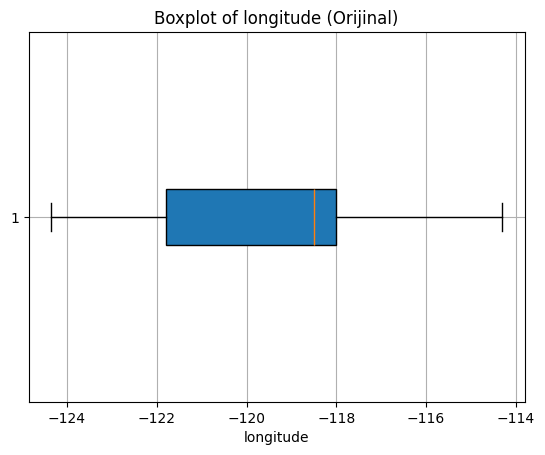

IQR: 3.79, Lower Bound: -127.48, Upper Bound: -112.33
IQR ile Aykırı Değer Sayısı: 0
Z-Score ile Aykırı Değer Sayısı: 0


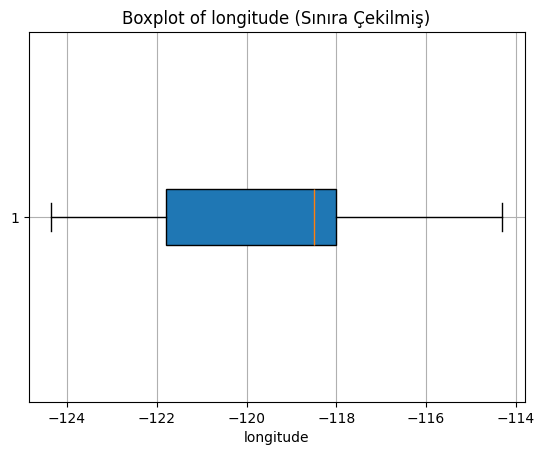


--- latitude Sütunu ---


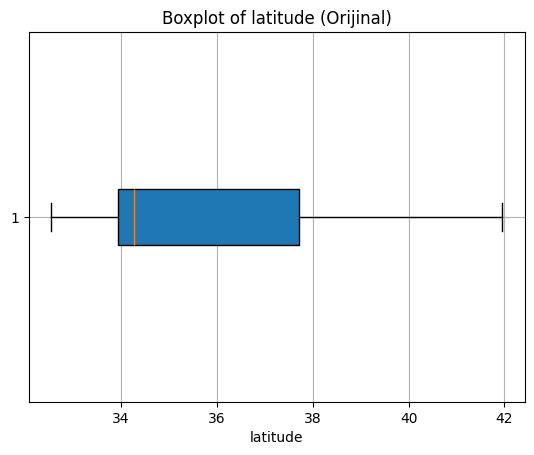

IQR: 3.78, Lower Bound: 28.26, Upper Bound: 43.38
IQR ile Aykırı Değer Sayısı: 0
Z-Score ile Aykırı Değer Sayısı: 0


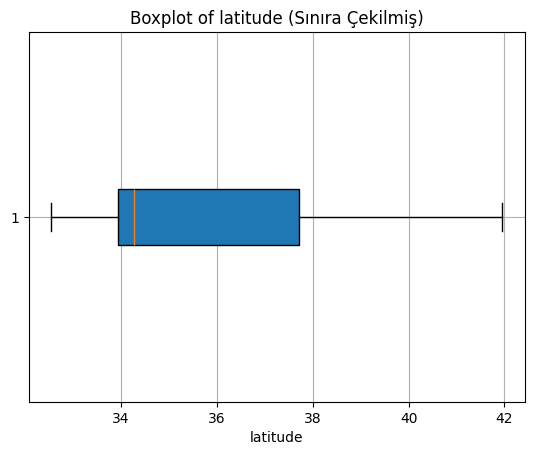


--- housing_median_age Sütunu ---


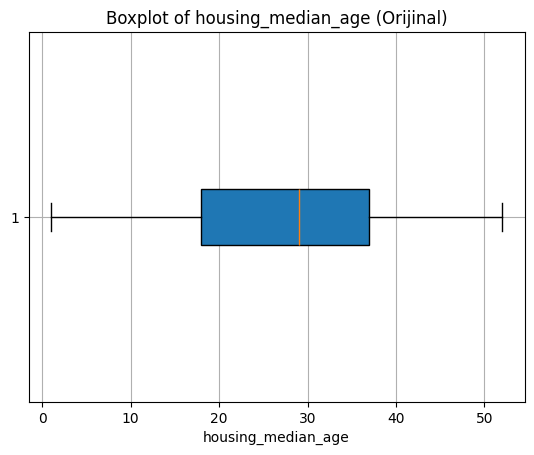

IQR: 19.00, Lower Bound: -10.50, Upper Bound: 65.50
IQR ile Aykırı Değer Sayısı: 0
Z-Score ile Aykırı Değer Sayısı: 0


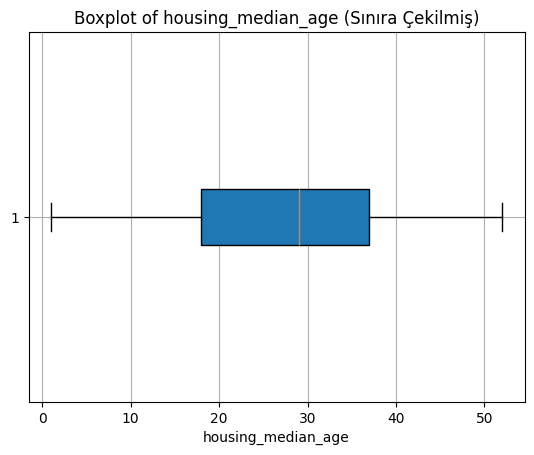


--- total_rooms Sütunu ---


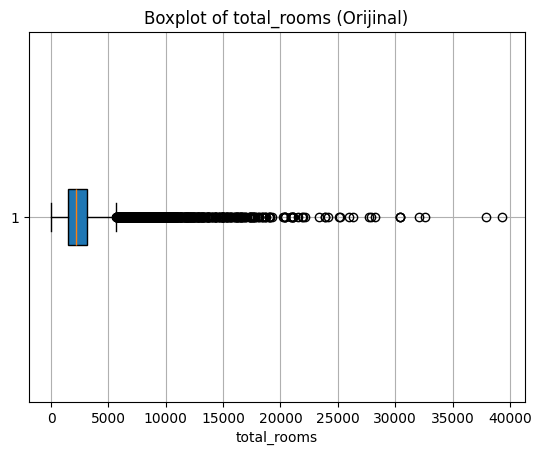

IQR: 1700.25, Lower Bound: -1102.62, Upper Bound: 5698.38
IQR ile Aykırı Değer Sayısı: 1287
Z-Score ile Aykırı Değer Sayısı: 373


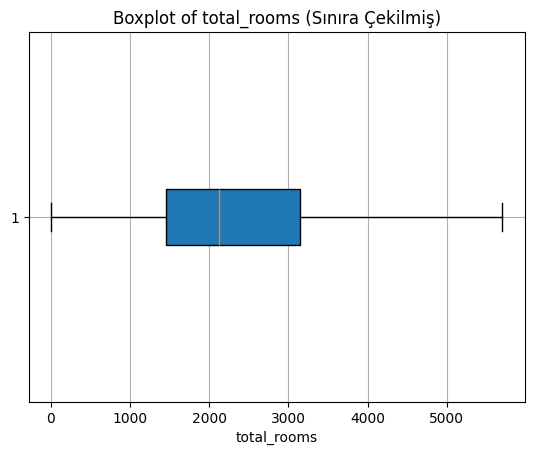


--- total_bedrooms Sütunu ---


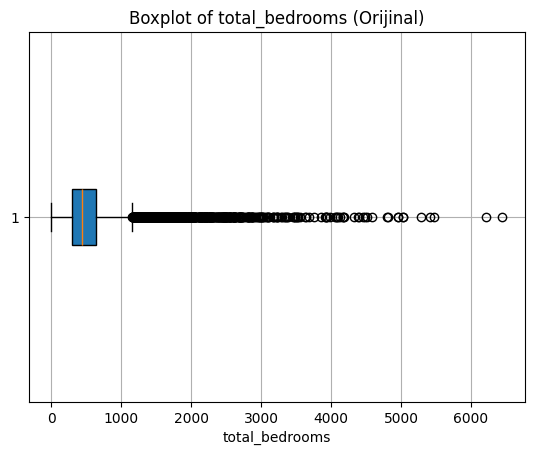

IQR: 346.25, Lower Bound: -222.38, Upper Bound: 1162.62
IQR ile Aykırı Değer Sayısı: 1306
Z-Score ile Aykırı Değer Sayısı: 375


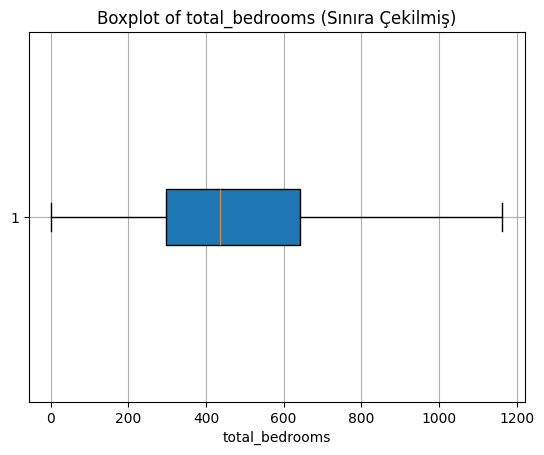


--- population Sütunu ---


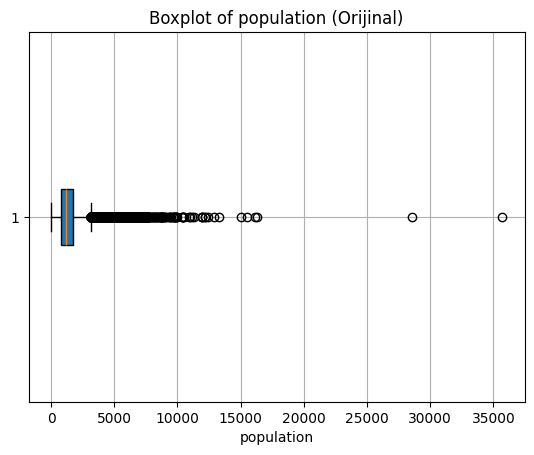

IQR: 938.00, Lower Bound: -620.00, Upper Bound: 3132.00
IQR ile Aykırı Değer Sayısı: 1196
Z-Score ile Aykırı Değer Sayısı: 342


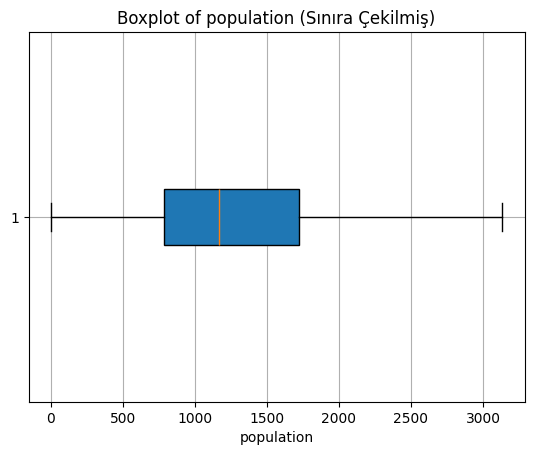


--- households Sütunu ---


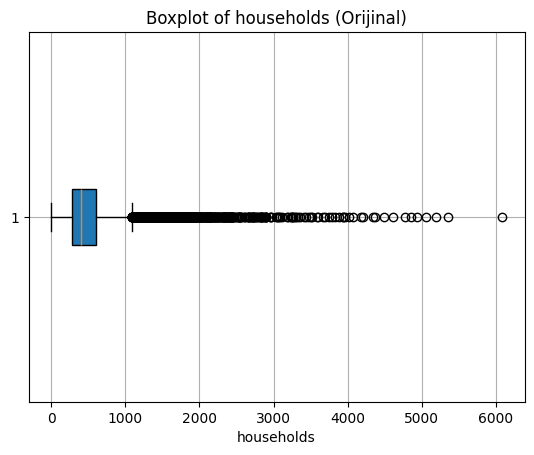

IQR: 325.00, Lower Bound: -207.50, Upper Bound: 1092.50
IQR ile Aykırı Değer Sayısı: 1220
Z-Score ile Aykırı Değer Sayısı: 363


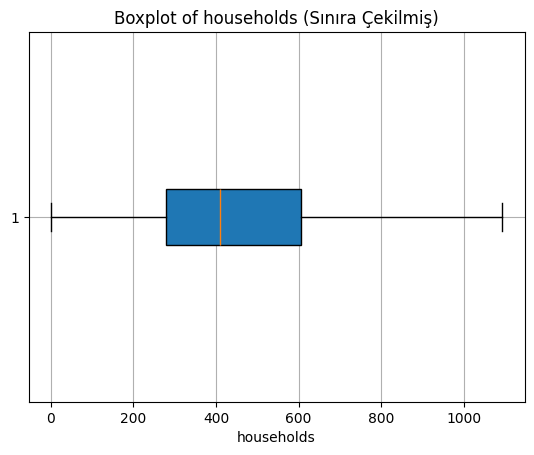


--- median_income Sütunu ---


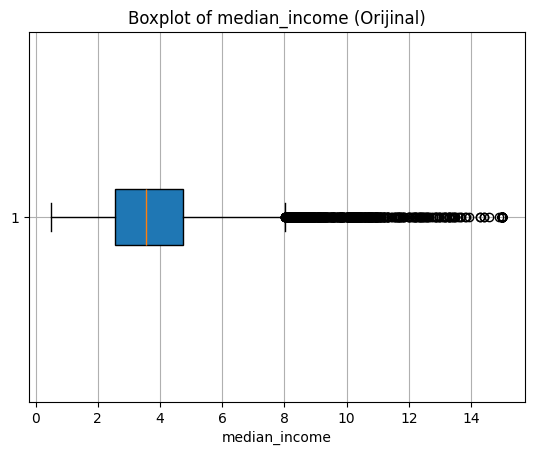

IQR: 2.18, Lower Bound: -0.71, Upper Bound: 8.01
IQR ile Aykırı Değer Sayısı: 681
Z-Score ile Aykırı Değer Sayısı: 345


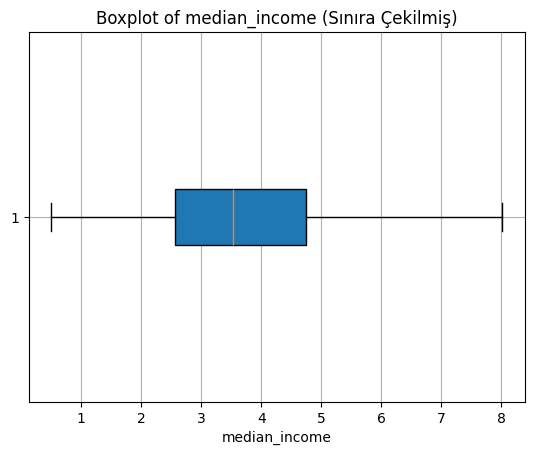


--- median_house_value Sütunu ---


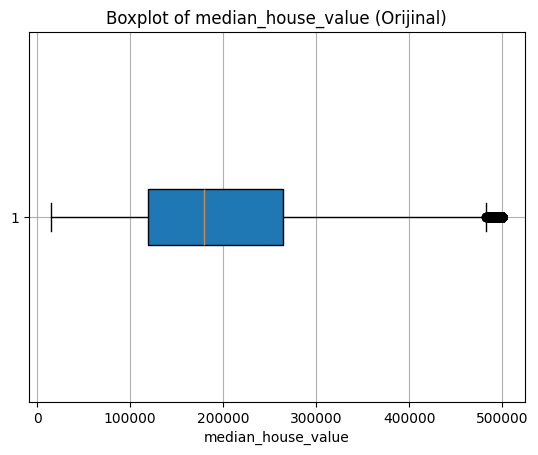

IQR: 145125.00, Lower Bound: -98087.50, Upper Bound: 482412.50
IQR ile Aykırı Değer Sayısı: 1071
Z-Score ile Aykırı Değer Sayısı: 0


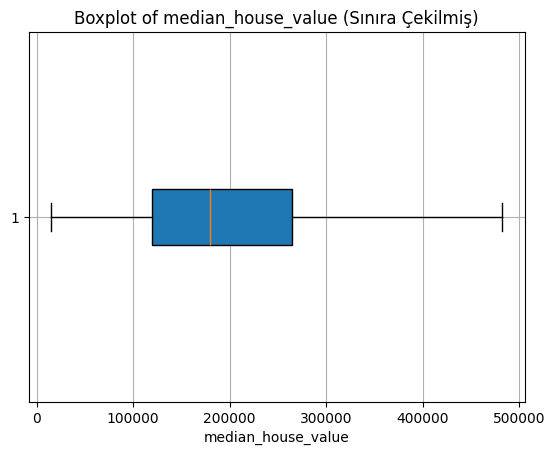

In [ ]:
#analyze_outliers_all_methods(df, numeric_columns)

Bu fonksiyon sonucunda her değişkenimiz için ilk önce aykırı değerleri düzeltilmeden önceki halinin boxplotunu ve ardından hem IQR hem de Z-score yöntemi kullanılarak aykırı değer sayıları bulunmuş ve aykırı değerlerin temizlenmesi yapılmıştır. En son olarak da değişkenlerin aykırı değerlerinin sınıra çekerek düzeltildikten sonraki halinin boxplotlarını göstermektedir.

Tabi ki bu grafikleriden de görüldüğü gibi bazı değişkenlerimizin aykırı değerlerinin sınıra çekilmesi yeterli değildir. Çok uç değerleri var ve istatistikleri bozuyorlar. Bu sebeple 'total_rooms','total_bedrooms', 'population', 'households', 'median_income' değişkenlerinde çok uç değerleri kaldırma yoluna gideceğim. Tabi bunu fonksiyonu çalıştırmadan önce yapmalıyım o sebeple fonksiyonumu bu işlermlerden sonra çalıştıracağım.


Sayısal Sütunlar:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

--- total_rooms Sütunu ---


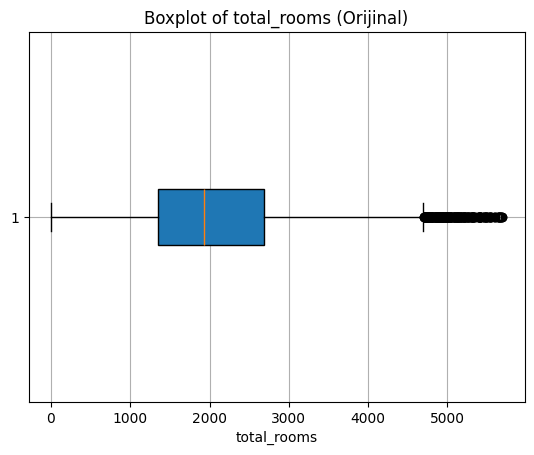

IQR: 1340.00, Lower Bound: -664.00, Upper Bound: 4696.00
IQR ile Aykırı Değer Sayısı: 248
Z-Score ile Aykırı Değer Sayısı: 90


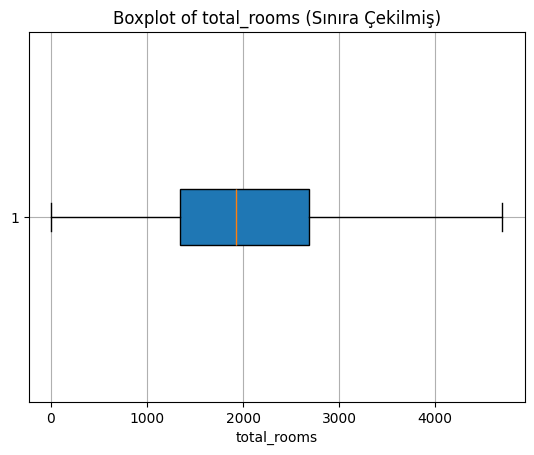


--- total_bedrooms Sütunu ---


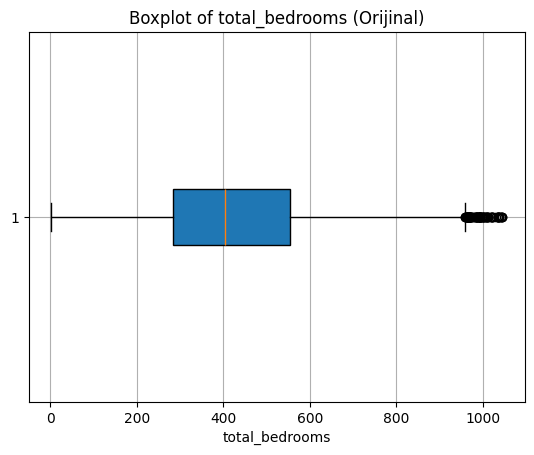

IQR: 270.25, Lower Bound: -122.38, Upper Bound: 958.62
IQR ile Aykırı Değer Sayısı: 78
Z-Score ile Aykırı Değer Sayısı: 11


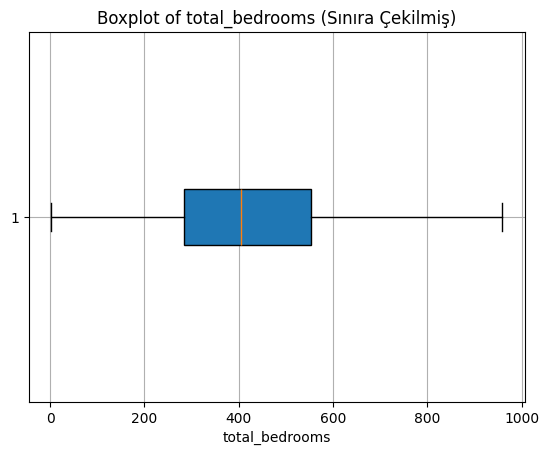


--- population Sütunu ---


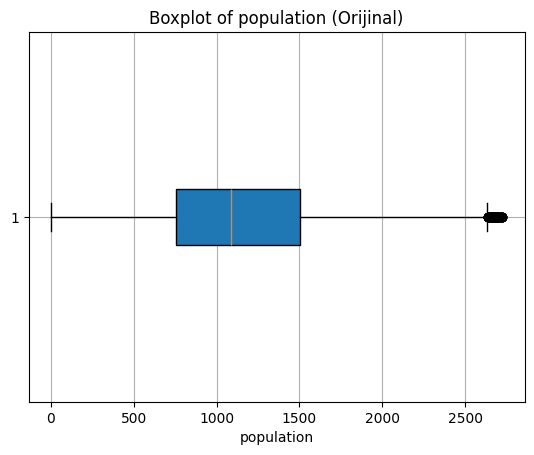

IQR: 752.00, Lower Bound: -375.00, Upper Bound: 2633.00
IQR ile Aykırı Değer Sayısı: 78
Z-Score ile Aykırı Değer Sayısı: 0


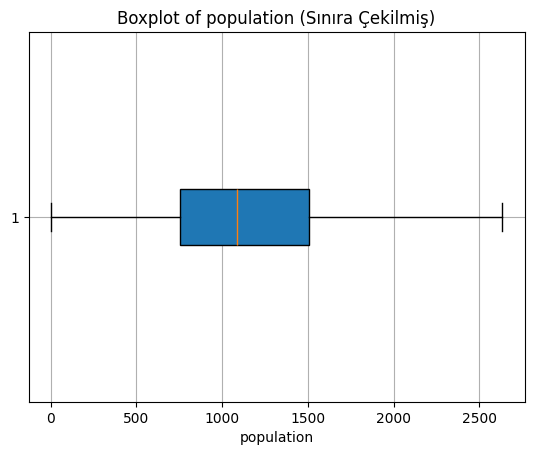


--- households Sütunu ---


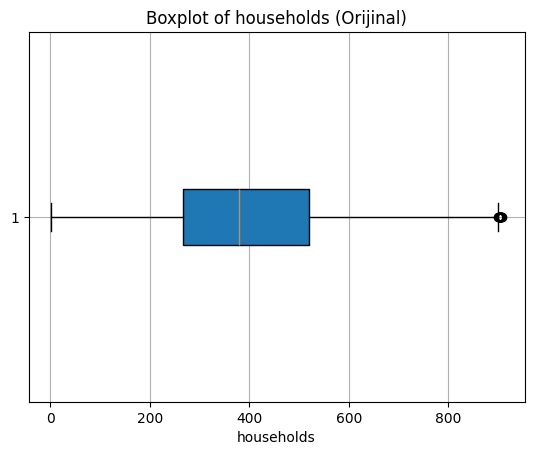

IQR: 253.00, Lower Bound: -112.50, Upper Bound: 899.50
IQR ile Aykırı Değer Sayısı: 19
Z-Score ile Aykırı Değer Sayısı: 0


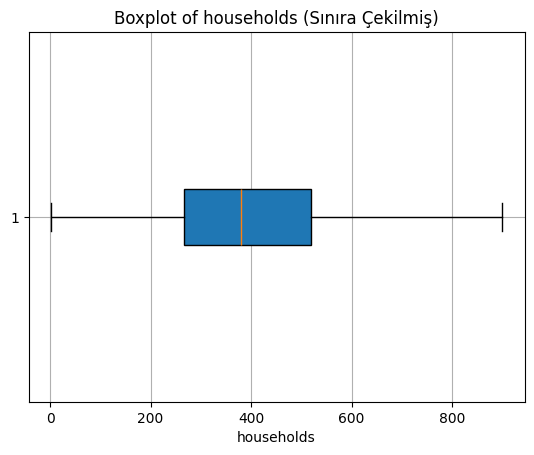


--- median_income Sütunu ---


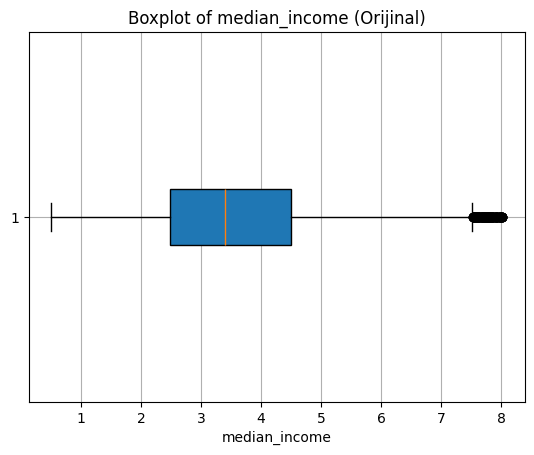

IQR: 2.02, Lower Bound: -0.54, Upper Bound: 7.53
IQR ile Aykırı Değer Sayısı: 143
Z-Score ile Aykırı Değer Sayısı: 25


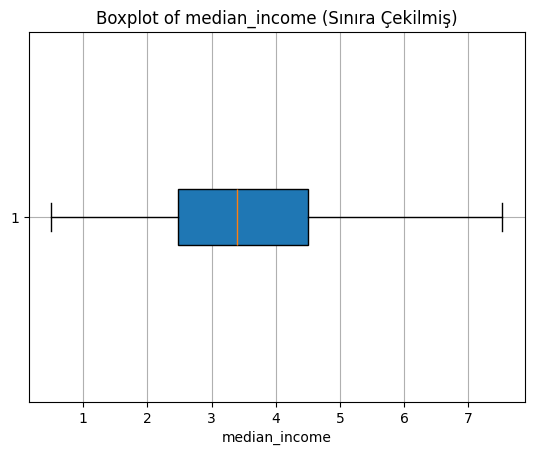


--- median_house_value Sütunu ---


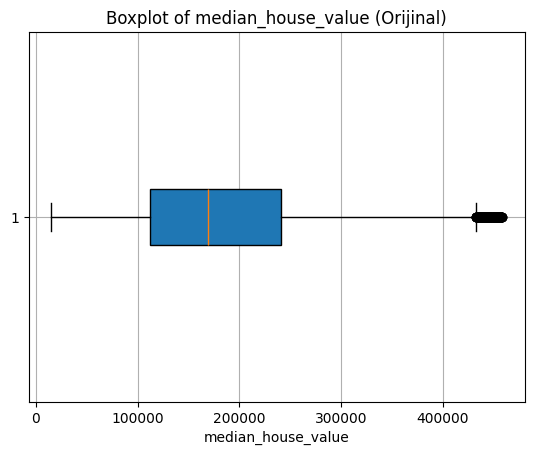

IQR: 128000.00, Lower Bound: -79500.00, Upper Bound: 432500.00
IQR ile Aykırı Değer Sayısı: 183
Z-Score ile Aykırı Değer Sayısı: 0


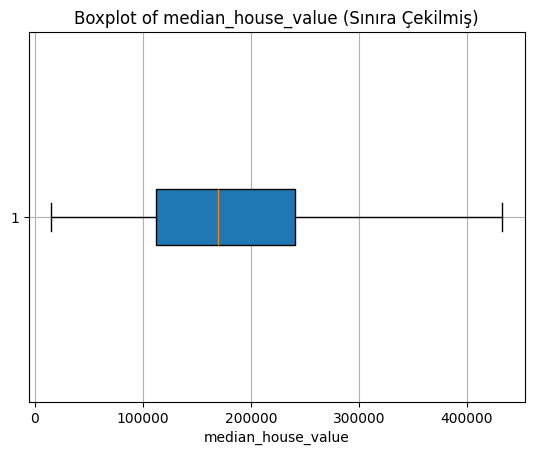

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nSayısal Sütunlar:")
print(numeric_columns)

def remove_outliers(data, numeric_columns):
    cleaned_data = data.copy()

    for col in numeric_columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Aykırı değerleri çıkar
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

numeric_columns = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
data_cleaned = remove_outliers(df, numeric_columns)

# Şimdi temizlenmiş veriyle analiz yapalım
analyze_outliers_all_methods(data_cleaned, numeric_columns)

Verinin doğasını değiştirmemek için ilk olarak sayısal değişkenlerde aykırı değerleri temizledim ve ardından sınıra çekme işlemi uyguladım bu şekilde veri setimiz aykırı değerlere duyarlı algoritmalarla kullanıldığında yanlış hesaplamalara sebebiyet vermeyecek.



## Standartlaştırma ve Görselleştirme
Standartlaştırma işlemi yapmadan önce veriyi test ve train olarak ayırmalıyız. Çünkü, eğer veriyi bölmeden önce standartlaştırırsak, test setindeki bilgiler train setine sızabilir (data leakage).

Bunun için belirli adımlar izlemeliyiz. Elimizdeki kategorik değişken olan "ocean_proximity" değişkenini label encode yapma yöntemini tercih ediyorum çünkü bu değişkende bir as üst ilişkisi mevcut yani okyanusa daha yakın evlerin fiyatları daha yüksek bu yüzden okyanısa daha yakın evler fiyat değişkenini daha fazla etikiliyor.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder oluştur
label_encoder = LabelEncoder()

# Encode işlemini uygula
data_cleaned['ocean_proximity'] = label_encoder.fit_transform(data_cleaned['ocean_proximity'])


Bu işlemden sonra kategoriler sayılara dönüştürüldü:

NEAR BAY → 0

INLAND → 1

NEAR OCEAN → 2

ISLAND → 3

<1H OCEAN → 4

Bu işlemden sonra verimizin bağımlı ve bağımsız değişkenlerini belirleyip onları test ve train olarak ayırdıktan sonra en son olarak da standartlaştırma işlemini uygulayacağım.

In [ ]:
from sklearn.model_selection import train_test_split
# Bağımsız ve bağımlı değişkenleri ayır
X = data_cleaned.drop(columns=['median_house_value'])  # Sadece bağımsız değişkenler
y = data_cleaned['median_house_value']

# Train-test ayırma (%80 train, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Standartlaştırılmış veriyi DataFrame'e dönüştürme
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)

# İlk 5 satırı görüntüleme
print(X_train_scaled_df.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2232     -119.78     36.85                12.0        782.0           166.0   
7759     -118.14     33.91                36.0       1096.0           204.0   
10694    -117.74     33.62                16.0       1889.0           590.0   
17833    -121.85     37.41                17.0       2156.0           435.0   
18844    -123.08     41.26                34.0       2773.0           679.0   

       population  households  median_income  ocean_proximity  
2232        292.0       164.0         2.8274                1  
7759        569.0       201.0         4.4750                0  
10694       686.0       537.0         3.4706                0  
17833      1400.0       393.0         5.6096                0  
18844      1066.0       424.0         1.6757                1  


Artık tüm veriler sayısal hale geldi, stadnartlaştırıldı ve modellemeye hazır.

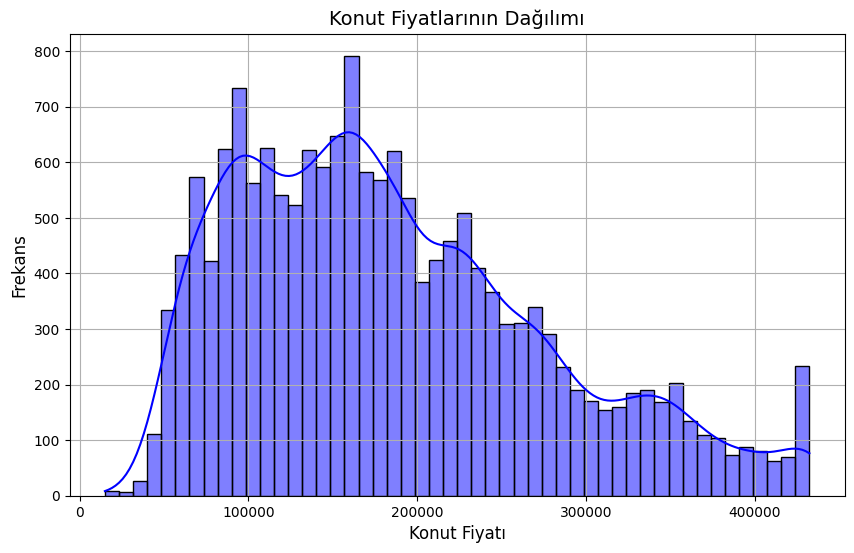

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram çizimi
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], bins=50, kde=True, color='blue')

# Grafiğe başlık ve etiketler ekleyelim
plt.title('Konut Fiyatlarının Dağılımı', fontsize=14)
plt.xlabel('Konut Fiyatı', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.grid(True)

# Grafiği göster
plt.show()


Konu fiyatlarının dağılımını histogram üzerinden incelediğimizde sola yatık left-skewed yorumu yapılabilir. Yüksek fiyatlı evler bulunsa da genellikle konut fiyatlarının 100000-200000 arasında yoğunluk gösterdiğinden söz edebiliriz.

Gelir ve ev fiyatları arasındaki ilişkiyi gösterirken en uygun yöntemin scatterplot kullanmak olduğunu düşünüyorum. Çünkü aralarındaki ilişkinin doğrusal ilerleyip ilerlemediğini göslemlememize en olanak veren grafik türümüz. Şimdi görselleştirme işlemini uygulayalım ve yorumlayalım.

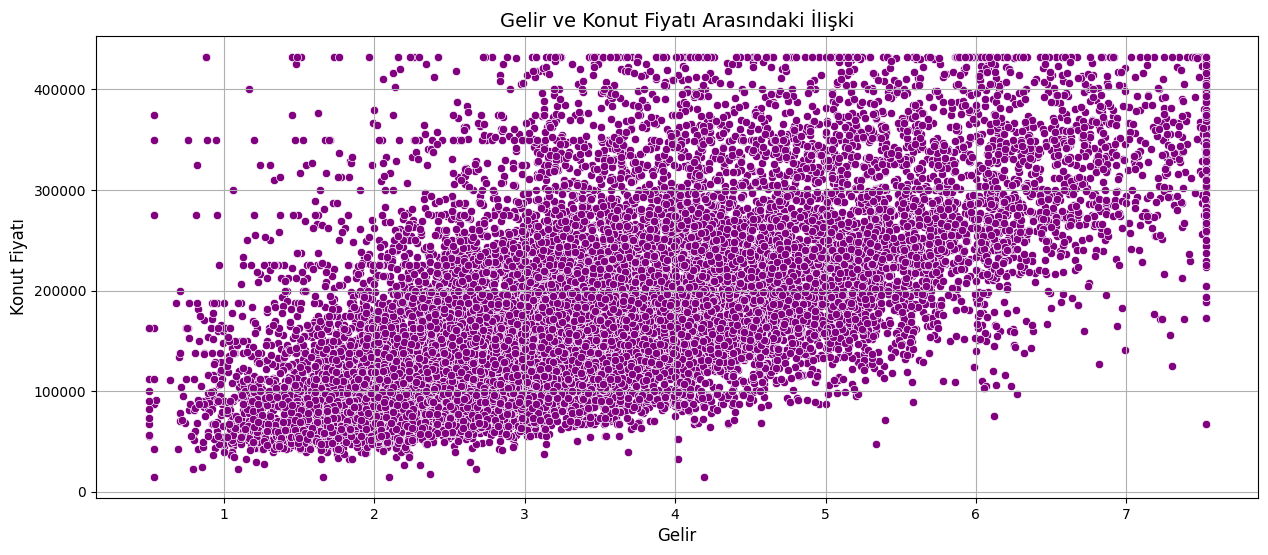

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot ile gelir ve ev fiyatı arasındaki ilişkiyi görselleştirelim
plt.figure(figsize=(15, 6))
sns.scatterplot(x=data_cleaned['median_income'], y=data_cleaned['median_house_value'], color='purple')

# Grafiğe başlık ve etiketler ekleyelim
plt.title('Gelir ve Konut Fiyatı Arasındaki İlişki', fontsize=14)
plt.xlabel('Gelir', fontsize=12)
plt.ylabel('Konut Fiyatı', fontsize=12)
plt.grid(True)

# Grafiği göster
plt.show()


Grafiğimizden de gözlemlediğimiz gibi bazi istisnalar olsa da genellikle gelir ve konut fiyatı arasında linear bir ilişki vardır diyebiliriz.

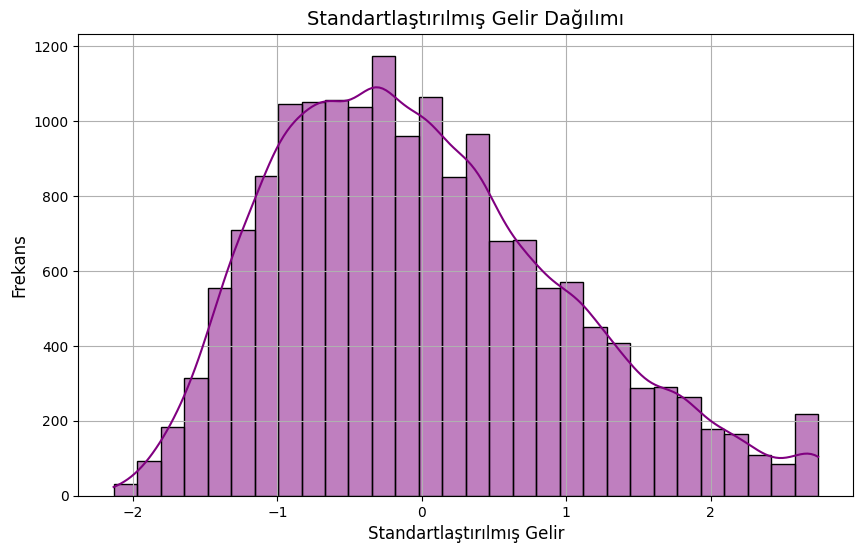

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Gelir sütununu alalım ve standartlaştırma işlemi uygulayalım
scaler = StandardScaler()
data_cleaned['standardized_income'] = scaler.fit_transform(data_cleaned[['median_income']])

# Standartlaştırılmış gelirin dağılımını görselleştirelim
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['standardized_income'], kde=True, color='purple', bins=30)

plt.title('Standartlaştırılmış Gelir Dağılımı', fontsize=14)
plt.xlabel('Standartlaştırılmış Gelir', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.grid(True)
plt.show()


Grafiğimizi incelediğimizde standartlaşmış gelirin genellikle -1 ve 1 arasında yer aldığını gözlemliyoruz. Bu da verini çoğunun ortalama değere yakın olduğunu ve büyük bir kısmının ortalama ile standart sapma arasında yer aldığını gösterir. Yani aşırı düşük veya aşırı yüksek gelirlerin nadir olduğu sonucuna varabiliriz.

##  Sonuçları Değerlendirme

### Aykırı Değerlerin Temizlenmesi:
Aykırı değerlerin temizlenmesi, veri setinin daha doğru, stabil ve sağlıklı hale gelmesini sağladı. Ve bu da modelin doğru tahminler yapmasına yardımcı olur(modeli eğitme sürecinde).

### Standartlaştırma:
Standartlaştırma, verilerin farklı ölçeklerdeki özelliklerini aynı düzeye getirdi bu da modelin daha etkili bir şekilde öğrenmesine olanak tanıyor

### Veri Dağılımı ve Temizliği:
Temizlenmiş verilerle yapılan analiz daha sağlıklı ve tutarlı sonuçlar elde etmenizi sağladı. Özellikle uç değerlerin silinmesi modelin genelleme gücünü artırarak daha güvenilir tahminler elde edilmesine yardımcı olur

Sonuç olarak aykırı değerlerin temizlenmesi ve standartlaştırma işlemleri veri analizi ve modelleme süreçlerinde daha doğru güvenilir ve verimli sonuçlar elde etmenizi sağlayacağı için bu işlemler aslında makine öğrenmesi süreçlerinin en önemli adımlarıdır.